In [ ]:
from fastai.vision import *
from fastai.callbacks.hooks import *

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import zipfile
 
local_zip = '/content/gdrive/MyDrive/competition_data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/salt')
zip_ref.close()

In [ ]:
os.listdir('/tmp/salt/competition_data/train')

['images', 'masks']

In [ ]:
images_path='/tmp/salt/competition_data/train/images'
labels_path='/tmp/salt/competition_data/train/masks'

In [ ]:
fnames = get_image_files(images_path)
fnames[:3]

[PosixPath('/tmp/salt/competition_data/train/images/268d39db25.png'),
 PosixPath('/tmp/salt/competition_data/train/images/c256f6e713.png'),
 PosixPath('/tmp/salt/competition_data/train/images/e6caf5eb81.png')]

In [ ]:
lbl_names = get_image_files(labels_path)
lbl_names[:3]

[PosixPath('/tmp/salt/competition_data/train/masks/268d39db25.png'),
 PosixPath('/tmp/salt/competition_data/train/masks/c256f6e713.png'),
 PosixPath('/tmp/salt/competition_data/train/masks/e6caf5eb81.png')]

In [ ]:
def my_open(self, fn):
  return open_mask(fn, after_open=self.after_open, div=True)

SegmentationLabelList.open=my_open

In [ ]:
data=(SegmentationItemList.from_folder(path='/tmp/salt/competition_data/train/images')
      .split_by_rand_pct(0.2)
      .label_from_func(lambda x : str(x).replace('images', 'masks'), classes=[0, 1])
      .transform(get_transforms(), size=256, tfm_y=True)
      .databunch(path=Path('.'), bs=16)
      .normalize(imagenet_stats))

In [ ]:
learn = unet_learner(data, models.resnet34, metrics=[dice])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,dice,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


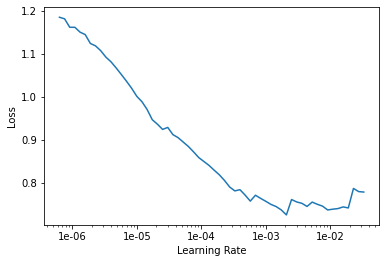

In [ ]:
lr_find(learn)
learn.recorder.plot()

In [ ]:
learn.unfreeze()
lr=1e-03
learn.fit_one_cycle(5,slice(lr/30))

epoch,train_loss,valid_loss,dice,time
0,0.413564,0.305731,0.302592,05:39
1,0.276994,0.227380,0.413262,05:37
2,0.258637,0.186647,0.524462,05:36
3,0.223362,0.179285,0.531829,05:36
4,0.215367,0.174503,0.548129,05:36


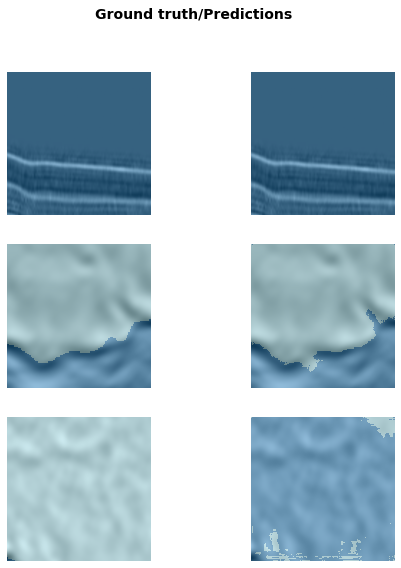

In [ ]:
learn.show_results(rows=3, figsize=(8,9))

In [ ]:
learn.export("export.pkl")

In [ ]:
learn.save('model-stage-2') # save model
learn.load('model-stage-2');
learn.export()

In [ ]:
import torch
learn2 = load_learner("./")
# torch.save(learn1.model.state_dict(), "fasti_unet_weights.pth")

In [ ]:
image_path = open_image("/tmp/salt/competition_data/train/images/0ce8a6ae62.png")
pred_fastai = learn.predict(image_path)

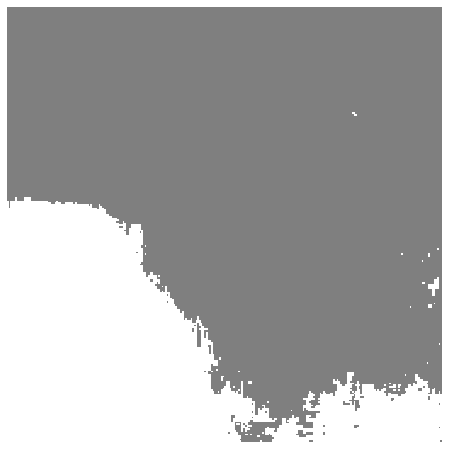

In [ ]:
pred_fastai[0].show(figsize=(8,8),cmap='gray')

In [ ]:
import numpy as np
v=np.array(pred_fastai[0])

In [ ]:
import io
import base64
from PIL import Image

In [ ]:
p=np.array(pred_fastai[1])

In [ ]:
p=p*255

In [ ]:
p

array([[[  0,   0,   0,   0, ...,   0,   0,   0,   0],
        [  0,   0,   0,   0, ...,   0,   0,   0,   0],
        [  0,   0,   0,   0, ...,   0,   0,   0,   0],
        [  0,   0,   0,   0, ...,   0,   0,   0,   0],
        ...,
        [255, 255, 255, 255, ..., 255, 255, 255, 255],
        [255, 255, 255, 255, ..., 255, 255, 255, 255],
        [255, 255, 255, 255, ..., 255, 255, 255, 255],
        [255, 255, 255, 255, ..., 255, 255, 255,   0]]])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
p.shape

(256, 256)

In [ ]:
cv2.imwrite('color_img1.png', p)

True

In [ ]:
p=p.reshape(256,256)

In [ ]:
data=asarray(p)

NameError: ignored

In [ ]:
im = Image.fromarray((p * 255).astype(np.uint8))

In [ ]:
im.save('hi1.png')

In [ ]:
img = Image.fromarray(p)

TypeError: ignored

In [ ]:
data = io.BytesIO(p)

In [ ]:
encoded_img_data = base64.b64encode(data.getvalue())

In [ ]:
a=cv2.imread(data,0)

SystemError: ignored

In [ ]:
pred_fastai[0].save('arti.png')

In [ ]:
mask.save('mask.jpg')

In [ ]:
p=cv2.imread('arti.png',0)

In [ ]:
p=p*255

In [ ]:
cv2.imwrite('arrayto.png',p)

True

In [ ]:
import fastai

In [ ]:
fastai.__version__

'1.0.61'

In [ ]:
import torch

In [ ]:
torch.__version__

'1.8.1+cu101'

In [ ]:
import numpy as np
a=np.zeros((256,256))

In [ ]:
from PIL import Image
img = Image.fromarray(a, 'RGB')
img.save('white.png')
img.show()

In [ ]:
im=Image.open('white.png')

In [ ]:
import cv2 as cv
a=cv.imread('white.png')

In [ ]:
a=a+255

In [ ]:
cv.imwrite('black.png',a)

True